In [7]:
DATADIR="/ssd2/arthur/TREC2019/data/"

In [12]:
import os
import gzip
queries_file = os.path.join(DATADIR, "queries", "msmarco-docdev-queries.tsv.gz")
lens  = []
for line in gzip.open(queries_file):
    lens.append(len(line.split(b"\t")[1].split()))
    

In [15]:
import numpy as np 
np.mean(lens), np.median(lens), np.std(lens)

(5.891199691892933, 6.0, 2.511116353157464)

In [27]:
" ".join(line.split("\t")[2:])

'The hot glowing surfaces of stars emit energy in the form of electromagnetic radiation.? Science & Mathematics PhysicsThe hot glowing surfaces of stars emit energy in the form of electromagnetic radiation.?It is a good approximation to assume that the emissivity e is equal to 1 for these surfaces.  Find the radius of the star Rigel, the bright blue star in the constellation Orion that radiates energy at a rate of 2.7 x 10^32 W and has a surface temperature of 11,000 K. Assume that the star is spherical. Use σ =... show moreFollow 3 answersAnswersRelevanceRatingNewestOldestBest Answer: Stefan-Boltzmann law states that the energy flux by radiation is proportional to the forth power of the temperature: q = ε · σ · T^4 The total energy flux at a spherical surface of Radius R is Q = q·π·R² = ε·σ·T^4·π·R² Hence the radius is R = √ ( Q / (ε·σ·T^4·π) ) = √ ( 2.7x10+32 W / (1 · 5.67x10-8W/m²K^4 · (1100K)^4 · π) ) = 3.22x10+13 mSource (s):http://en.wikipedia.org/wiki/Stefan_bolt...schmiso · 1 d

In [13]:
tokenized_text

['the',
 'hot',
 'glowing',
 'surfaces',
 'of',
 'stars',
 'emi',
 '##t',
 'energy',
 'in',
 'the',
 'form',
 'of',
 'electromagnetic',
 'radiation',
 '.',
 '?',
 'science',
 '&',
 'mathematics',
 'physics',
 '##the',
 'hot',
 'glowing',
 'surfaces',
 'of',
 'stars',
 'emi',
 '##t',
 'energy',
 'in',
 'the',
 'form',
 'of',
 'electromagnetic',
 'radiation',
 '.',
 '?',
 'it',
 'is',
 'a',
 'good',
 'approximation',
 'to',
 'assume',
 'that',
 'the',
 'emi',
 '##ssi',
 '##vity',
 'e',
 'is',
 'equal',
 'to',
 '1',
 'for',
 'these',
 'surfaces',
 '.',
 'find',
 'the',
 'radius',
 'of',
 'the',
 'star',
 'rig',
 '##el',
 ',',
 'the',
 'bright',
 'blue',
 'star',
 'in',
 'the',
 'constellation',
 'orion',
 'that',
 'ra',
 '##dia',
 '##tes',
 'energy',
 'at',
 'a',
 'rate',
 'of',
 '2',
 '.',
 '7',
 'x',
 '10',
 '^',
 '32',
 'w',
 'and',
 'has',
 'a',
 'surface',
 'temperature',
 'of',
 '11',
 ',',
 '000',
 'k',
 '.',
 'assume',
 'that',
 'the',
 'star',
 'is',
 'spherical',
 '.',
 'use',
 

In [14]:
line

'D1555982\thttps://answers.yahoo.com/question/index?qid=20071007114826AAwCFvR\tThe hot glowing surfaces of stars emit energy in the form of electromagnetic radiation.?\tScience & Mathematics PhysicsThe hot glowing surfaces of stars emit energy in the form of electromagnetic radiation.?It is a good approximation to assume that the emissivity e is equal to 1 for these surfaces.  Find the radius of the star Rigel, the bright blue star in the constellation Orion that radiates energy at a rate of 2.7 x 10^32 W and has a surface temperature of 11,000 K. Assume that the star is spherical. Use σ =... show moreFollow 3 answersAnswersRelevanceRatingNewestOldestBest Answer: Stefan-Boltzmann law states that the energy flux by radiation is proportional to the forth power of the temperature: q = ε · σ · T^4 The total energy flux at a spherical surface of Radius R is Q = q·π·R² = ε·σ·T^4·π·R² Hence the radius is R = √ ( Q / (ε·σ·T^4·π) ) = √ ( 2.7x10+32 W / (1 · 5.67x10-8W/m²K^4 · (1100K)^4 · π) ) = 

In [16]:
str(tokenized_text)

"['the', 'hot', 'glowing', 'surfaces', 'of', 'stars', 'emi', '##t', 'energy', 'in', 'the', 'form', 'of', 'electromagnetic', 'radiation', '.', '?', 'science', '&', 'mathematics', 'physics', '##the', 'hot', 'glowing', 'surfaces', 'of', 'stars', 'emi', '##t', 'energy', 'in', 'the', 'form', 'of', 'electromagnetic', 'radiation', '.', '?', 'it', 'is', 'a', 'good', 'approximation', 'to', 'assume', 'that', 'the', 'emi', '##ssi', '##vity', 'e', 'is', 'equal', 'to', '1', 'for', 'these', 'surfaces', '.', 'find', 'the', 'radius', 'of', 'the', 'star', 'rig', '##el', ',', 'the', 'bright', 'blue', 'star', 'in', 'the', 'constellation', 'orion', 'that', 'ra', '##dia', '##tes', 'energy', 'at', 'a', 'rate', 'of', '2', '.', '7', 'x', '10', '^', '32', 'w', 'and', 'has', 'a', 'surface', 'temperature', 'of', '11', ',', '000', 'k', '.', 'assume', 'that', 'the', 'star', 'is', 'spherical', '.', 'use', 'σ', '=', '.', '.', '.', 'show', 'more', '##fo', '##llo', '##w', '3', 'answers', '##ans', '##wer', '##sr', '##e

In [11]:
def getcontent(docid, file_name):
    """getcontent(docid, f) will get content for a given docid (a string) from filehandle f.
    The content has four tab-separated strings: docid, url, title, body.
    """
    with open(file_name, encoding='utf-8') as f:
        f.seek(docoffset[docid])
        line = f.readline()
        assert line.startswith(docid + "\t"), \
            f"Looking for {docid}, found {line}"
    return line.rstrip()
import csv
docoffset = {}
lookup_file = os.path.join(DATADIR, "docs", "msmarco-docs-lookup.tsv")
with open(lookup_file, 'r', encoding='utf-8') as f:
    tsvreader = csv.reader(f, delimiter="\t")
    for [docid, _, offset] in tsvreader:
        docoffset[docid] = int(offset)


In [17]:
import os
from pytorch_transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("/ssd2/arthur/TREC2019/data/models/")

docs_file = os.path.join(DATADIR, "docs", "msmarco-docs.tsv")
lens  = []
docs_processed = set()
from tqdm.auto import tqdm
for line in open("/ssd2/arthur/TREC2019/data/runs/dev_QL.run"):
    doc_id = line.split()[2]
    docs_processed.add(doc_id)
for doc in tqdm(docs_processed):
    tokenized = tokenizer.tokenize(getcontent(doc, docs_file))
    lens.append(len(tokenized))

KeyboardInterrupt: 

In [38]:
np.mean(lens), np.median(lens), np.std(lens)

(1084.8807160292922, 551.0, 2324.2245817825396)

In [43]:
%matplotlib inline
from matplotlib import pyplot as plt 
lens = np.asarray(lens)

In [55]:
np.median(lens)

551.0

In [60]:
lens_ = lens[lens<2000]

(array([42276., 38806., 44514., 54142., 62180., 64484., 66520., 64897.,
        66221., 65962., 63913., 64070., 64885., 63347., 62866., 62001.,
        62560., 61689., 60450., 57545., 57366., 56386., 57287., 54486.,
        52975., 53428., 51962., 50282., 48188., 46790., 44802., 44421.,
        41417., 38779., 37560., 35667., 34282., 33352., 31765., 30375.,
        28805., 27754., 26648., 25467., 24599., 23902., 22813., 22398.,
        21828., 20944., 20161., 19441., 18717., 18121., 17173., 16502.,
        15979., 15424., 14519., 14484., 14089., 13720., 13046., 12903.,
        12229., 12023., 11482., 10838., 10513., 10286., 10125.,  9797.,
         9830.,  9052.,  9040.,  8843.,  8469.,  8284.,  8187.,  7875.,
         7625.,  7392.,  7209.,  7040.,  7036.,  6765.,  6709.,  6574.,
         6369.,  6011.,  6081.,  5885.,  5879.,  5641.,  5567.,  5486.,
         5395.,  5373.,  5117.,  5043.]),
 array([   0.  ,   19.99,   39.98,   59.97,   79.96,   99.95,  119.94,
         139.93,  159.9

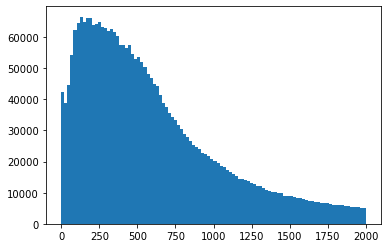

In [61]:
# plt.plot(np.histogram(lens))
plt.hist(lens_, bins=100)